In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import numpy as np

In [2]:
#读取数据
data=pd.read_csv('/Users/gongchen/Desktop/Matrix_Final/message.csv')
data

,区名,population,area,age>=60,2020GDP,type
0,浦东新区,568.15,1210,32.1,13207.03,Severe
1,闵行区,265.35,372,31.2,2564.82,Severe
2,宝山区,223.52,294,35.9,1578.48,Light
3,松江区,190.97,605,29.3,1637.11,Medium
4,嘉定区,183.43,464,34.2,2488.44,Light
5,黄浦区,66.20,20,40.5,2616.94,Severe
6,杨浦区,124.25,61,37.7,2106.63,Medium
7,青浦区,127.14,676,32.2,1194.01,Light
8,普陀区,123.98,56,39.9,1129.51,Light
9,奉贤区,114.09,687,32.7,1190.19,Light


In [3]:
#数据预处理
predata=data.drop(['区名','type'],axis=1)
predata

,population,area,age>=60,2020GDP
0,568.15,1210,32.1,13207.03
1,265.35,372,31.2,2564.82
2,223.52,294,35.9,1578.48
3,190.97,605,29.3,1637.11
4,183.43,464,34.2,2488.44
5,66.20,20,40.5,2616.94
6,124.25,61,37.7,2106.63
7,127.14,676,32.2,1194.01
8,123.98,56,39.9,1129.51
9,114.09,687,32.7,1190.19


In [37]:
#查看相关系数
# corrmatrix=predata.corr(method='pearson')
# corrmatrix

In [38]:
#中心标准化
# from sklearn import preprocessing
# test_data=preprocessing.scale(predata)
# test_data

In [39]:
#主成分分析
# from sklearn.decomposition import PCA
# pca=PCA(4)
# pca.fit(test_data)
# print(pca.explained_variance_ )
# print(pca.explained_variance_ratio_)

In [4]:
#主成分分析PCA
#数据标准化
std_data=(predata-predata.mean())/predata.std()
std_data

,population,area,age>=60,2020GDP
0,3.301214,1.830572,-0.965378,3.657205
1,0.879867,-0.095983,-1.212295,0.058284
2,0.545373,-0.275304,0.077162,-0.275271
3,0.285086,0.439682,-1.733565,-0.255443
4,0.224792,0.115524,-0.389238,0.032454
5,-0.712640,-0.905228,1.339183,0.075910
6,-0.248442,-0.810969,0.570996,-0.096664
7,-0.225332,0.602911,-0.937943,-0.405288
8,-0.250601,-0.822464,1.174572,-0.427101
9,-0.329687,0.628199,-0.800767,-0.406580


In [5]:
#计算协方差矩阵
mean_data=std_data.mean()
cov_mat=(std_data-mean_data).T.dot((std_data-mean_data)/(std_data.shape[0]-1))#shape[0]与shape[1]分别描述的是矩阵的行数和列数
cov_mat

,population,area,age>=60,2020GDP
population,1.000000,0.439759,-0.501861,0.899231
area,0.439759,1.000000,-0.530785,0.365924
age>=60,-0.501861,-0.530785,1.000000,-0.258491
2020GDP,0.899231,0.365924,-0.258491,1.000000


In [6]:
#协方差矩阵计算方法2
corr_data=std_data.corr()
corr_data

,population,area,age>=60,2020GDP
population,1.000000,0.439759,-0.501861,0.899231
area,0.439759,1.000000,-0.530785,0.365924
age>=60,-0.501861,-0.530785,1.000000,-0.258491
2020GDP,0.899231,0.365924,-0.258491,1.000000


In [7]:
#计算特征值和特征向量
eig_value,eig_vector=np.linalg.eig(corr_data)
#特征值排序
eig=pd.DataFrame({'eig_value':eig_value})
eig=eig.sort_values(by=["eig_value"],ascending=False)
eig

,eig_value
0,2.523523
2,0.930692
3,0.484252
1,0.061534


In [8]:
eig_value

array([2.52352259, 0.06153372, 0.93069212, 0.48425157])

In [9]:
eig_vector

array([[ 0.58114506,  0.72402042, -0.32999988,  0.17077742],
       [ 0.44526521,  0.04584288,  0.50160688, -0.74028904],
       [-0.43543852,  0.23492367, -0.58430134, -0.64326985],
       [ 0.52383452, -0.64691864, -0.54596938, -0.09492687]])

In [10]:
#获取累计贡献度
eig_contrib=[(i / eig['eig_value'].sum()) for i in sorted(eig_value,reverse=True)]#各自贡献度
eig['eig_cum']=(eig['eig_value']/eig['eig_value'].sum()).cumsum()
eig

,eig_value,eig_cum
0,2.523523,0.630881
2,0.930692,0.863554
3,0.484252,0.984617
1,0.061534,1.000000


In [11]:
eig_contrib

[0.630880646358768,
 0.23267302978357132,
 0.12106289344694929,
 0.015383430410711368]

In [12]:
#合并入特征向量
eig=eig.merge(pd.DataFrame(eig_vector).T,left_index=True,right_index=True)
eig

,eig_value,eig_cum,0,1,2,3
0,2.523523,0.630881,0.581145,0.445265,-0.435439,0.523835
2,0.930692,0.863554,-0.330000,0.501607,-0.584301,-0.545969
3,0.484252,0.984617,0.170777,-0.740289,-0.643270,-0.094927
1,0.061534,1.000000,0.724020,0.045843,0.234924,-0.646919


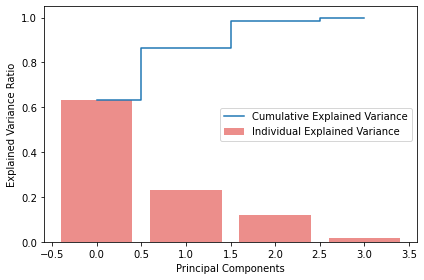

In [13]:
#可视化显示每个特征值占多少贡献度
#可视化显示，每个特征值占多少
plt.figure(figsize=(6, 4))
plt.bar(range(4), eig_contrib, alpha=0.5, align='center',label='Individual Explained Variance',color="#da1f18")
plt.step(range(4), eig['eig_cum'], where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('/Users/gongchen/Desktop/Matrix_Final/contribution.jpg')
plt.show()

In [14]:
#提取主成分
#要求：累计贡献度达到80%，取前两个特征做主成分
#成分得分系数矩阵，因子载荷矩阵法
main_principal=eig.iloc[:2,2:].T
main_principal['vars']=std_data.columns
main_principal

,0,2,vars
0,0.581145,-0.330000,population
1,0.445265,0.501607,area
2,-0.435439,-0.584301,age>=60
3,0.523835,-0.545969,2020GDP


In [15]:
#计算降维后结果
score=pd.DataFrame(np.dot(std_data,main_principal.iloc[:,0:2]))
score

,0,1
0,5.069707,-1.603823
1,1.027004,0.338023
2,0.016562,-0.212864
3,0.982502,1.278858
4,0.368566,0.193479
5,-1.360582,-1.042828
6,-0.804747,-0.605660
7,0.333617,1.146100
8,-1.247034,-0.782975
9,0.223823,1.113775


In [67]:
#结果可视化_前后比较==》PCA可靠性的验证，降维后精确性验证
#1. 给疫情发展情况定标准
marchdata=pd.read_csv('/Users/gongchen/Desktop/Matrix_Final/March.csv')
marchdata

,区名,3月28日,3月29,3月30日,3月31日
0,浦东,119,286,529,707
1,黄浦,14,18,30,37
2,徐汇,31,64,75,93
3,长宁,10,13,21,64
4,静安,30,37,45,49
5,普陀,14,20,26,31
6,虹口,8,14,15,23
7,杨浦,3,6,9,14
8,闵行,63,77,94,149
9,宝山,25,57,56,60


In [68]:
aprildata=pd.read_csv('/Users/gongchen/Desktop/Matrix_Final/April.csv')
aprildata

,区名,4月1日,4月2日,4月3日,4月4日,4月5日,4月6日,4月7日,4月8日,4月9日,...,4月13日,4月14日,4月15日,4月16日,4月17日,4月18日,4月19日,4月20日,4月21日,4月22日
0,浦东,778,881,1017,1218,1376,1517,1807,2134,2596,...,3838,5090,5458,6256,6269,6707,6344,6506,6108,5867
1,黄浦,41,67,80,86,102,110,124,161,257,...,681,947,1191,1372,1531,1745,2062,2263,2345,2684
2,徐汇,129,171,204,211,228,246,283,386,407,...,641,948,1215,1375,1519,1515,1588,1734,2002,2042
3,长宁,62,69,82,83,89,118,145,160,178,...,348,490,711,822,866,1033,1028,1125,1157,1271
4,静安,59,82,109,108,119,141,159,192,211,...,359,423,511,646,769,953,1144,1276,1387,1439
5,普陀,43,82,103,102,108,134,143,157,175,...,299,335,394,536,858,875,943,956,993,994
6,虹口,25,54,65,70,77,77,103,117,118,...,336,510,794,950,1213,1412,1503,1556,1556,1912
7,杨浦,25,44,74,84,93,104,133,142,173,...,350,398,671,753,770,801,844,1036,1075,1149
8,闵行,199,249,305,313,326,345,436,481,542,...,1158,1430,1690,2562,2651,2908,3203,3432,3344,3418
9,宝山,69,104,136,137,143,148,151,170,195,...,188,208,259,285,356,525,532,607,719,845


In [69]:
decided_data=pd.merge(marchdata,aprildata,how='left',left_on='区名',right_on='区名')
decided_data

,区名,3月28日,3月29,3月30日,3月31日,4月1日,4月2日,4月3日,4月4日,4月5日,...,4月13日,4月14日,4月15日,4月16日,4月17日,4月18日,4月19日,4月20日,4月21日,4月22日
0,浦东,119,286,529,707,778,881,1017,1218,1376,...,3838,5090,5458,6256,6269,6707,6344,6506,6108,5867
1,黄浦,14,18,30,37,41,67,80,86,102,...,681,947,1191,1372,1531,1745,2062,2263,2345,2684
2,徐汇,31,64,75,93,129,171,204,211,228,...,641,948,1215,1375,1519,1515,1588,1734,2002,2042
3,长宁,10,13,21,64,62,69,82,83,89,...,348,490,711,822,866,1033,1028,1125,1157,1271
4,静安,30,37,45,49,59,82,109,108,119,...,359,423,511,646,769,953,1144,1276,1387,1439
5,普陀,14,20,26,31,43,82,103,102,108,...,299,335,394,536,858,875,943,956,993,994
6,虹口,8,14,15,23,25,54,65,70,77,...,336,510,794,950,1213,1412,1503,1556,1556,1912
7,杨浦,3,6,9,14,25,44,74,84,93,...,350,398,671,753,770,801,844,1036,1075,1149
8,闵行,63,77,94,149,199,249,305,313,326,...,1158,1430,1690,2562,2651,2908,3203,3432,3344,3418
9,宝山,25,57,56,60,69,104,136,137,143,...,188,208,259,285,356,525,532,607,719,845


In [70]:
#decided_data.to_csv('/Users/gongchen/Desktop/Matrix_Final/decided_number.csv')

In [16]:
std_data['type']=data['type']
std_data

,population,area,age>=60,2020GDP,type
0,3.301214,1.830572,-0.965378,3.657205,Severe
1,0.879867,-0.095983,-1.212295,0.058284,Severe
2,0.545373,-0.275304,0.077162,-0.275271,Light
3,0.285086,0.439682,-1.733565,-0.255443,Medium
4,0.224792,0.115524,-0.389238,0.032454,Light
5,-0.712640,-0.905228,1.339183,0.075910,Severe
6,-0.248442,-0.810969,0.570996,-0.096664,Medium
7,-0.225332,0.602911,-0.937943,-0.405288,Light
8,-0.250601,-0.822464,1.174572,-0.427101,Light
9,-0.329687,0.628199,-0.800767,-0.406580,Light


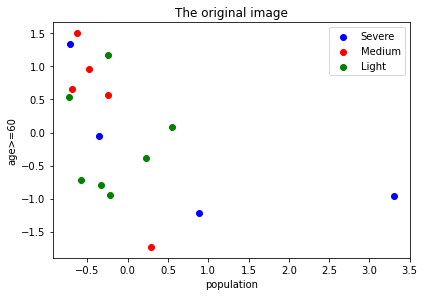

In [17]:
#可视化
#原来的图
plt.figure(figsize=(6, 4))
for lab, col in zip(('Severe', 'Medium', 'Light'),('blue', 'red', 'green')):
     plt.scatter(std_data[std_data['type']==lab]['population'],std_data[std_data['type']==lab]['age>=60'],label=lab,c=col)
plt.xlabel('population')
plt.ylabel('age>=60')
plt.legend(loc='best')
plt.tight_layout()
plt.title('The original image')
plt.show()

In [19]:
score['type']=data['type']
score

,0,1,type
0,5.069707,-1.603823,Severe
1,1.027004,0.338023,Severe
2,0.016562,-0.212864,Light
3,0.982502,1.278858,Medium
4,0.368566,0.193479,Light
5,-1.360582,-1.042828,Severe
6,-0.804747,-0.605660,Medium
7,0.333617,1.146100,Light
8,-1.247034,-0.782975,Light
9,0.223823,1.113775,Light


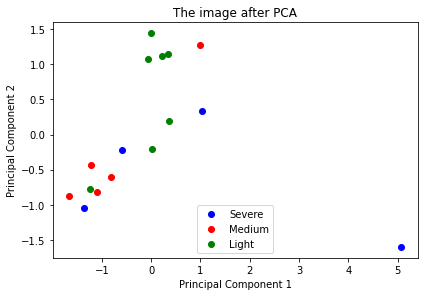

In [20]:
#主成分后的结果
plt.figure(figsize=(6, 4))
for lab, col in zip(('Severe', 'Medium', 'Light'),('blue', 'red', 'green')):
     plt.scatter(score[score['type']==lab][0],score[score['type']==lab][1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.title('The image after PCA')
plt.show()

In [21]:
main_principal[2]

0   -0.330000
1    0.501607
2   -0.584301
3   -0.545969
Name: 2, dtype: float64

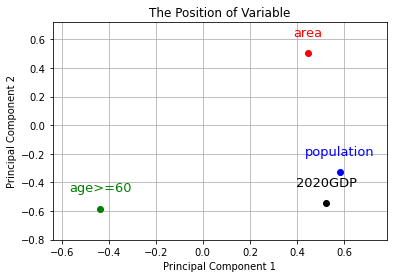

In [22]:
#查看变量因素在新坐标系下的位置
xmin ,xmax = main_principal[0].min(), main_principal[0].max()
ymin, ymax = main_principal[2].min(), main_principal[2].max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for x, y,z,col in zip(main_principal[0], main_principal[2], main_principal["vars"],('blue', 'red', 'green','black')):
    plt.plot(x,y, "o",c=col)
    plt.text(x, y+0.1, z, ha='center', va='bottom', fontsize=13,c=col)
plt.grid(True)
plt.title('The Position of Variable')
plt.show()